In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [2]:
from scripts import utils,dataset,DTI

In [3]:
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'Morgan'
target_encoding = 'AAC'

In [5]:
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random', frac = [0.7,0.1,0.2], random_seed = 2)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
Done.


In [6]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12])

In [7]:
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.3229. Total time 0.0 hours
Validation at Epoch 1 with loss:0.81867, MSE: 0.60141 , Pearson Correlation: 0.56137 with p-value: 3.03468 , Concordance Index: 0.79176
Training at Epoch 2 iteration 0 with loss 0.47841. Total time 0.00472 hours
Validation at Epoch 2 with loss:0.68336, MSE: 0.58128 , Pearson Correlation: 0.56635 with p-value: 1.28770 , Concordance Index: 0.79651
Training at Epoch 3 iteration 0 with loss 0.78576. Total time 0.00972 hours
Validation at Epoch 3 with loss:0.50057, MSE: 0.56645 , Pearson Correlation: 0.57732 with p-value: 8.79302 , Concordance Index: 0.79842
Training at Epoch 4 iteration 0 with loss 0.68866. Total time 0.01388 hours
Validation at Epoch 4 with loss:0.39308, MSE: 0.58027 , Pearson Correlation: 0.57107 with p-value: 8.54771 , Concordance Index: 0.79236
Training at Epoch 5 iteration 0 with loss 0.71344. Total time 0.01944 hours
Validation at 

Training at Epoch 40 iteration 0 with loss 0.23314. Total time 0.21805 hours
Validation at Epoch 40 with loss:0.29654, MSE: 0.33738 , Pearson Correlation: 0.78512 with p-value: 0.0 , Concordance Index: 0.86610
Training at Epoch 41 iteration 0 with loss 0.37127. Total time 0.22361 hours
Validation at Epoch 41 with loss:0.25537, MSE: 0.32046 , Pearson Correlation: 0.78876 with p-value: 0.0 , Concordance Index: 0.86223
Training at Epoch 42 iteration 0 with loss 0.19428. Total time 0.22916 hours
Validation at Epoch 42 with loss:0.31267, MSE: 0.31495 , Pearson Correlation: 0.79175 with p-value: 0.0 , Concordance Index: 0.86685
Training at Epoch 43 iteration 0 with loss 0.20917. Total time 0.235 hours
Validation at Epoch 43 with loss:0.41098, MSE: 0.42304 , Pearson Correlation: 0.78308 with p-value: 0.0 , Concordance Index: 0.86350
Training at Epoch 44 iteration 0 with loss 0.31621. Total time 0.24055 hours
Validation at Epoch 44 with loss:0.30607, MSE: 0.32456 , Pearson Correlation: 0.78458

Validation at Epoch 79 with loss:0.21222, MSE: 0.28039 , Pearson Correlation: 0.82055 with p-value: 0.0 , Concordance Index: 0.87758
Training at Epoch 80 iteration 0 with loss 0.11961. Total time 0.44305 hours
Validation at Epoch 80 with loss:0.31474, MSE: 0.28236 , Pearson Correlation: 0.82027 with p-value: 0.0 , Concordance Index: 0.87284
Training at Epoch 81 iteration 0 with loss 0.18332. Total time 0.44861 hours
Validation at Epoch 81 with loss:0.29492, MSE: 0.27844 , Pearson Correlation: 0.82013 with p-value: 0.0 , Concordance Index: 0.86591
Training at Epoch 82 iteration 0 with loss 0.13367. Total time 0.45416 hours
Validation at Epoch 82 with loss:0.25181, MSE: 0.27679 , Pearson Correlation: 0.82723 with p-value: 0.0 , Concordance Index: 0.88076
Training at Epoch 83 iteration 0 with loss 0.15534. Total time 0.46 hours
Validation at Epoch 83 with loss:0.34512, MSE: 0.27838 , Pearson Correlation: 0.82066 with p-value: 0.0 , Concordance Index: 0.87461
Training at Epoch 84 iteration

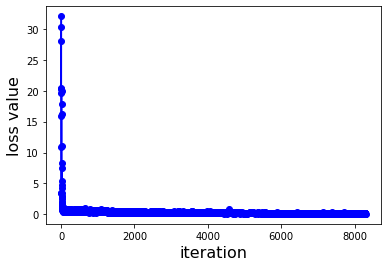

In [8]:
model.train(train, val, test)

In [9]:
model.save_model('./save_model/model_Morgan_AAC_Davis')